The purpose of this Sprint
Understanding K-means through scratches
Perform cluster analysis
How to learn
After implementing K-means in scratch, use it for cluster analysis.

# 2.K-means scratch
We will create a K-means class from scratch. We will implement the algorithm using only the minimum library such as NumPy.

The template is prepared below. Add some code to this ScratchKMeans class.

In [6]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

def eucledian_distance(x1,x2):
  distance = np.sqrt(np.sum((x1-x2)**2))
  return np.sqrt(np.sum((x1-x2)**2))

class ScratchKMeans():
    def __init__(self, k=5, max_iters=100, verbose=False):
        self.k = k
        self.max_iters = max_iters
        self.verbose = verbose
        self.sse = []
        

        self.clusters = [[] for _ in range(self.k)]
        

        self.centroids = []
        
    def fit(self, X):
        if self.verbose:
            print()
        return
    
    def fit_predict(self,X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        random_samples_idxs = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[idx] for idx in random_samples_idxs]
        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)
           
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            if self._is_converged(centroids_old, self.centroids):
              for i,cluster in enumerate(self.clusters):
                for sample_idx in cluster:
                  self.sse.append(eucledian_distance(X[sample_idx],self.centroids[i]))
              break
        return self._get_cluster_labels(self.clusters)
    
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            centroids_idx = self._closest_centroid(sample, centroids)
            clusters[centroids_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        distances = [eucledian_distance(sample,point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self,clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self, centroids_old, centroids):
        distances = [eucledian_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0
    
    def _get_cluster_labels(self,clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx,cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()

# Artificial dataset for clustering
We have the code to create an artificial dataset for experimenting with clustering.

This make_blobs function also outputs the correct label, but this time we will not use it. Received with_ (underscore) to indicate that it will not be used.

In [7]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# learning
We will create the elements necessary for learning K-means in order.

# [Problem 1] Determine the initial value of the center point
Create code that determines the initial value of $ \ mu_K $ from $ K $ center points $ \ mu_1 $ from the input data. $ K $ is the specified number of clusters.

The simplest way to determine the initial value is to randomly select $ K $ from the $ X_n $ data points. Please implement this this time.

The learning result of K-means is affected by the initial value of the center point $ \ mu $. Therefore, at the time of learning, calculation is performed with multiple initial values.



# [Problem 2] Creation of a function to obtain SSE
Create a function that calculates the sum of squared errors (SSE).

The purpose of K-means is to find $ r_ {nk} $ and $ \ mu_k $ that minimize this SSE. From the clustering results calculated with multiple initial values, use the function to find this SSE when deciding which one to finally adopt.

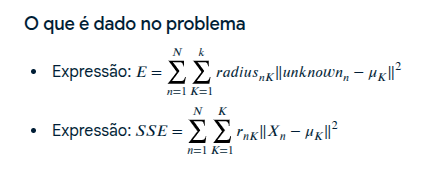

$ n $: Index of data points

$ k $: Cluster index

$ X_n $: $ n $ th data point

$ \ mu_k $: $ k $ th center point

$ r_ {nk} $: 1 if data point $ X_n $ belongs to cluster $ k $, 0 otherwise

Repeat cluster allocation and center point movement
The basis of learning K-means is to repeat the following two phases.

Fix the center point $ \ mu_k $ and choose the cluster allocation $ r_ {nk} $ that minimizes $ SSE $.
Cluster allocation Choose a center point $ \ mu_k $ that minimizes $ SSE $ while fixing $ r_ {nk} $.
The first center point $ \ mu_k $ is the initial value created in Problem 1.

I will look at them in order.



# [Problem 3] Allocation to cluster
Write code that assigns all data points $ X_n $ to the nearest center point $ \ mu_k $.

The closer the K-menas is that the Euclidean distance between the point and the point is reduced. The Euclidean distance is calculated by the Pythagorean theorem (three squares theorem), but it can be expressed by the following formula for the vectors $ p and q $.

∥​ ​q-p​ ​∥​ ​=​ ​√​ ​(q-p)​ ​⋅​ ​(q-p)‖q−p‖=(q−p)⋅(q−p)

Use this function as it is provided as np.linalg.norm​

This means that the center point $ \ mu_k $ is fixed and the SSE is minimized, but there is no need to find the SSE itself.



# [Problem 4] Movement of the center point
Write code that moves the center point $ \ mu_k $ to the mean (centroid) of all data points $ X_n $ assigned to the $ k $ th cluster.

You have fixed the cluster allocation $ r_ {nk} $ and minimized the SSE, but you do not need to ask for the SSE itself.

# [Problem 5] Repeat
Write code that learns by repeatedly assigning to the cluster and moving the center point.

Stop this if any of the following conditions are met:

The repeat reaches the specified number of times. (Argument max_iter in the template)
The sum of the difference between the center point $ \ mu_k $ and the center of gravity is less than or equal to the specified tolerance. (Argument tol in the template)


# [Problem 6] Calculate with different initial values
Create code that calculates the repetition of question 5 by changing the initial value a specified number of times. The number of times is specified by the argument n_init in the template.

Since the final learning result will be the one with the smallest SSE among multiple calculations, keep the center point $ \ mu_k $ at that time.

# [Problem 7] Estimate
When estimating which cluster to belong to for new data, do the same as in the first phase of training.

For the data point $ X_n $ and the center point $ \ mu_k $ determined by learning, select $ r_ {nk} $ that minimizes $ SSE $.
Specifically, it is as follows.

Assign the data point $ X_n $ to the nearest $ \ mu_k $.


# [Problem 8] Implementation of elbow method
In K-means, the number of center points $ k $ must be determined artificially, and there is an elbow method as a method of determining it. Write the code to consider the number of center points $ k $ by the elbow method.

Displays a line graph with SSE on the vertical axis and the number of clusters $ k $ on the horizontal axis. For this, make sure that you can get the SSE from an instance of K-means.



The k = 1
SSE = 264.23375429919724
The k = 2
SSE = 169.5198874181266
The k = 3
SSE = 103.6327139189524
The k = 4
SSE = 99.74085667810769


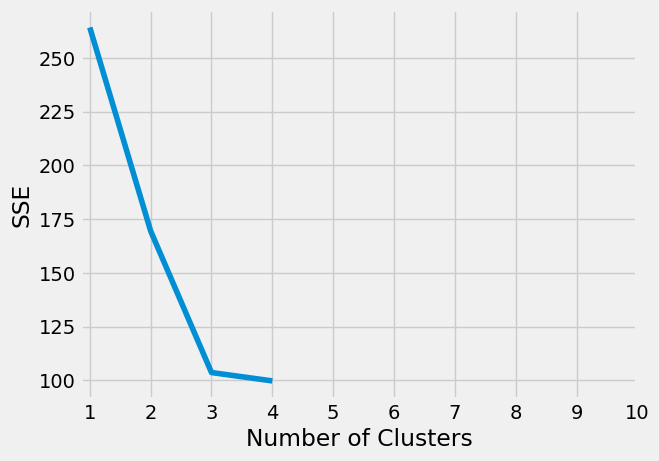

In [8]:
sse = []
for k in range(1, 5):
  k2 = ScratchKMeans(k, max_iters=150, verbose=True)
  y_pred2 = k2.fit_predict(X)
  sse.append(sum(k2.sse))
  print("The k =",k)
  print("SSE =",sum(k2.sse))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 5), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# [Problem 9] (Advance assignment) Silhouette diagram
There is also a silhouette diagram to help determine $ k $. Create code to display the silhouette diagram.

We have prepared the code to display the diagram using Matplotlib. Please give:

silhouette_vals: ndarray of shape (n_samples,), silhouette coefficient of each data point

silhouette_avg: float, average value of silhouette coefficient

y_km shape (n_samples,), cluster label name of each data point

cluster_labels: list, a list of cluster label names

n_clusters: int, number of clusters

The silhouette coefficient $ s_n $ for the $ n $ th data point can be calculated by the following formula. Implement this formula and check the silhouette diagram.

s​ ​n​ ​=​ ​b​ ​n-a​ ​n​ ​m​ ​a​ ​an unknown​ ​(b​ ​n,​ ​a​ ​n)sn=bn−anmax(bn,an)

$ a_n $: Cohesion. The average distance to other data points in the same cluster.

$ b_n $: Degree of divergence. Average distance to all data points in the closest other cluster.

Ideally, the divergence $ b $ is large and the cohesion $ a $ is small, with a silhouette coefficient of $ s $ close to 1.



In [9]:
from matplotlib import cm

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor="none",
        color=color,
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.show()

NameError: name 'cluster_labels' is not defined

# Wholesaler data analysis
Use the Wholesale customers Data Set to learn how to use clustering.

UCI Machine Learning Repository: Wholesale customers Data Set

Download Wholesale customers data.csv from the Data Folder. This is data collected from customers by a wholesaler in Lisbon, Portugal. The contents are data on how many euros each customer buys milk and groceries each year. Customers are retail stores and restaurants. Region and Channel are peeped and K-means is used for monetary data.

In [ ]:
data = pd.read_csv("Wholesale customers data.csv")
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)
data.head()

In [10]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


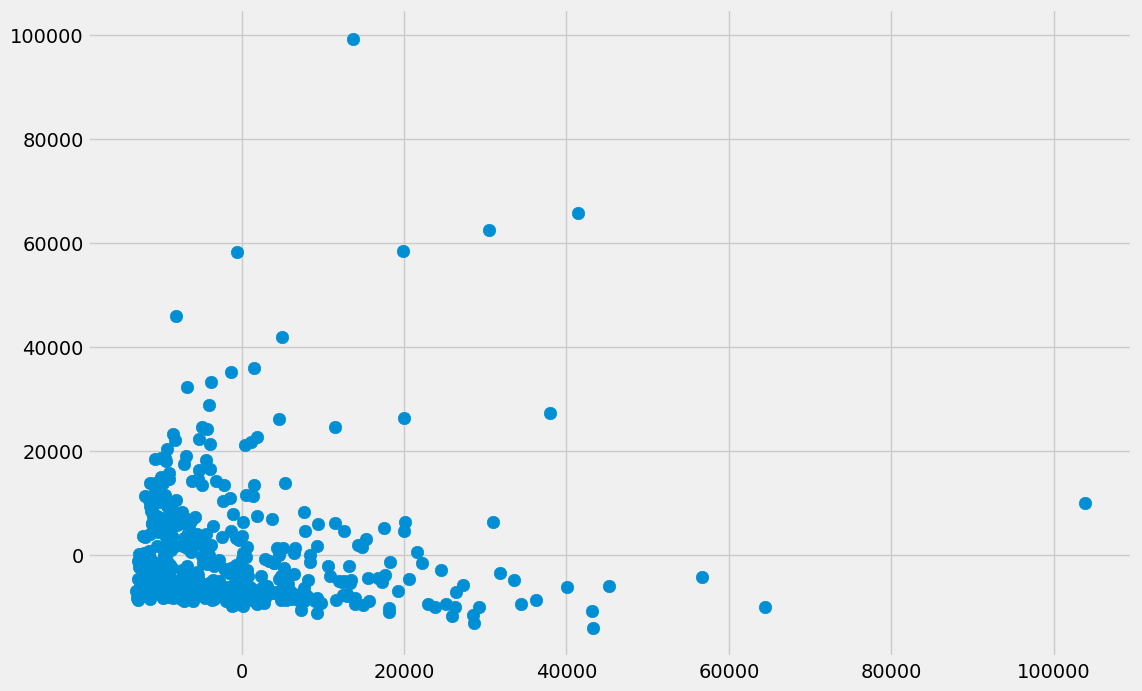

In [11]:
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 1
plt.scatter(data_pca[:,0],data_pca[:,1],s=80);

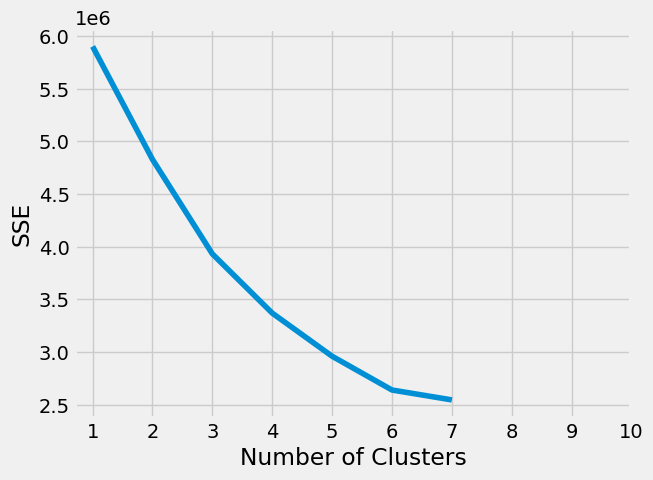

In [12]:
sse2 = []
for k in range(1, 8):
  k3 = ScratchKMeans(k, max_iters=150, verbose=True)
  y_pred3 = k3.fit_predict(data_pca)
  sse2.append(sum(k3.sse))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 8), sse2)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

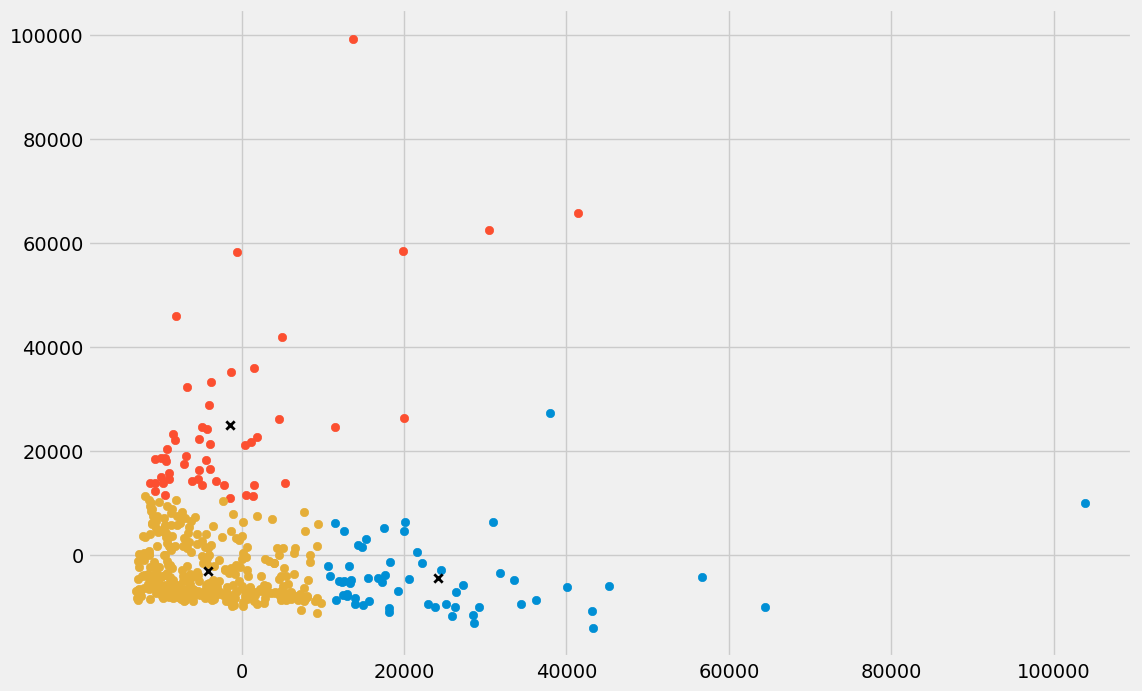

In [13]:
k4 = ScratchKMeans(k=3, max_iters=150, verbose=True)
y_pred3 = k4.fit_predict(data_pca)
k4.plot()

# Dimensionality reduction
There are 6 features related to the amount of money, but we will reduce the dimensions for visualization. For this, we have prepared a sample code of PCA by scikit-learn, so please use it.

《PCA sample code》

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(data)
data_pca = pca.transform(data)

In [15]:
from sklearn.decomposition
import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components = None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1, 7), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1, 7), cum_var_exp, where = 'mid', label = 'cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6, "blue", linestyles = 'dashed')
plt.legend(loc = 'best')
plt.grid()
plt.show()

SyntaxError: invalid syntax (4130118081.py, line 1)

# [Problem 10] Selection of the number of clusters k
Select the number of clusters $ k $ that you think is optimal. In addition to utilizing the elbow method and silhouette diagram, how humans want to use it later is also involved in the selection. Make your choice and explain why you chose it.



# [Problem 11] Comparison with known groups
Region and Channel were not used for K-means, but they are known groups. Find out and explain how the cluster differs from these known groups. First, visualize each one.


In [ ]:
sns.pairplot(data,hue='Channel');

In [ ]:
sns.pairplot(data,hue='Region');

In [ ]:
data.groupby(['Channel','Region']).count()

In [ ]:
data['clusters'] = y_pred3[:,]
data.head()


# [Problem 12] Useful information for wholesalers
Find information that is useful to the wholesaler and put it together in a sentence.

« Hint »

Let’s use the data before preprocessing and see the summary statistics of each cluster. Also, I used K-means for the data that was dimensionally reduced by PCA, but please try using 6 features as they are or using only some features. Please also refer to the comparison result with the known group.

​groupby is useful when viewing data by condition.

pandas.DataFrame.groupby — pandas 0.23.4 documentation


In [ ]:
data.groupby(['clusters']).count()


# 4.Other non-hierarchical clustering techniques
# [Problem 13] (Advance assignment) Investigation of other methods
In addition to K-means dealt with this time, DBSCAN is a well-known method for non-hierarchical clustering.
​Other than PCA, t-SNE and LLE are well-known methods for dimensionality reduction.

Advantages and disadvantages of DBSCAN
Advantages and disadvantages of t-SNE and LLE
Please describe about.



# [Problem 14] (Advance assignment) Use of t-SNE and DBSCAN
​Use t-SNE instead of PCA to reduce the dimensions of Wholesale customers’ data. Furthermore, cluster using DBSCAN instead of K-means.

Let’s compare the clustering result with the result of PCA + kmeans. Please use scikit-learn for implementation.

sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation

sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation

《Parameter tuning》

These are methods that are more difficult to tune parameters than K-means and PCA. It is also important to confirm the meaning of the parameters while referring to the paper as well as the scikit-learn document.

t-SNE treatise

DBSCAN treatise

Margin of error between the center point and the center of gravity, which is the reference for ending the iteration

Calculate which cluster the input data belongs to

The following forms of ndarray, shape (n_samples, n_features)

Output the learning process when #verbose is set to True

Maximum number of iterations in one calculation

How many times to change the initial value of the center point for calculation

Record hyperparameters as attributes

Calculate clustering by K-means

True to output the learning process

calculate clustering

K-means scratch implementation

Features of training data

scratch implementation

Number of clusters

In [16]:
X_embedded = TSNE(n_components=2).fit_transform(X)
clustering = DBSCAN(eps=3, min_samples=2).fit_predict(X_embedded)
clustering

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])